In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_raw = pd.read_csv('./zhengqi_train.txt', sep='\t')
train_raw.head(5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [6]:
test_raw = pd.read_csv('./zhengqi_test.txt', sep='\t')
test_raw.head(5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


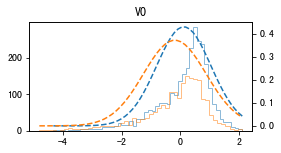

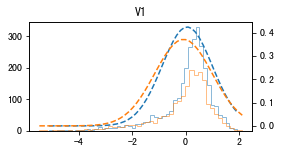

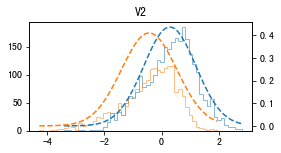

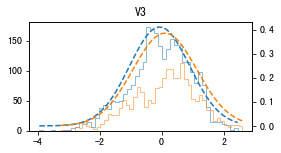

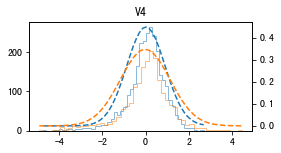

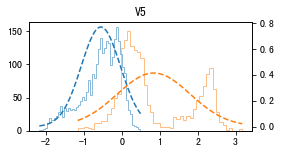

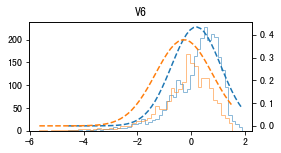

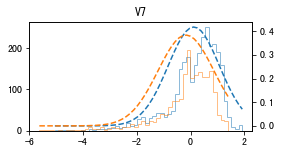

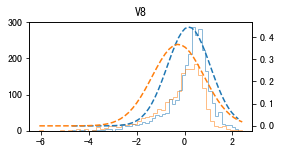

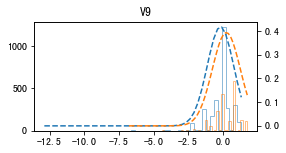

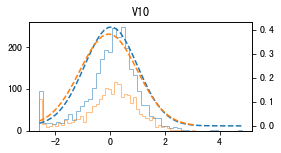

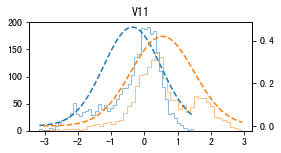

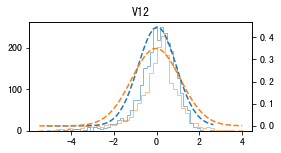

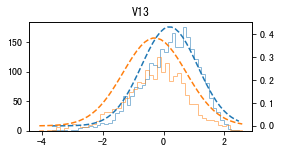

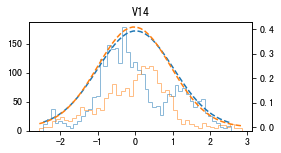

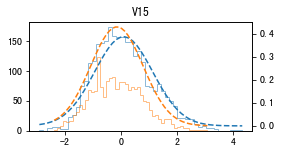

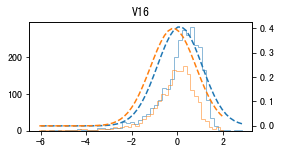

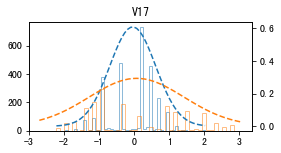

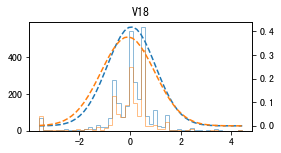

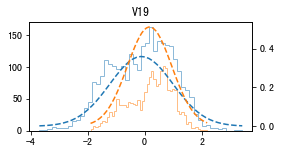

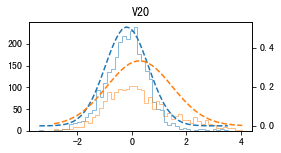

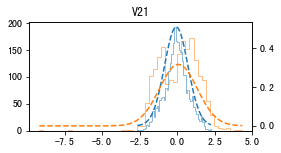

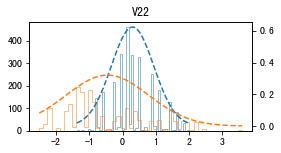

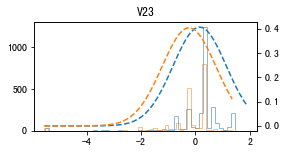

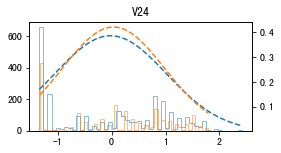

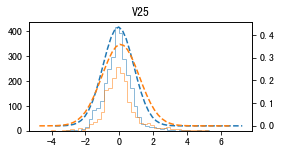

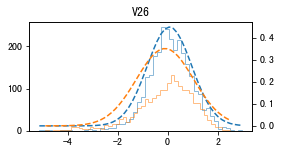

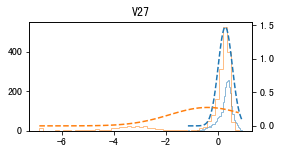

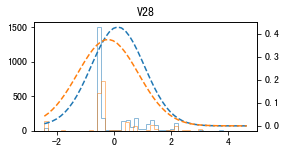

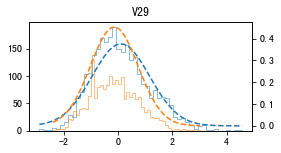

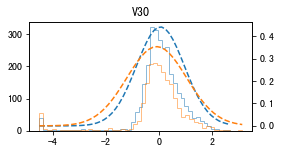

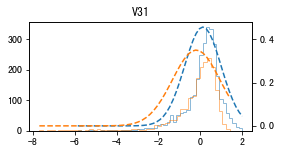

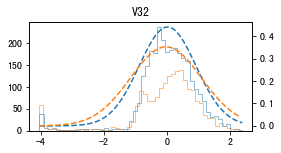

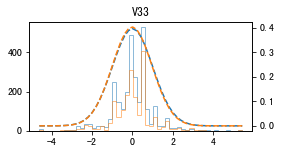

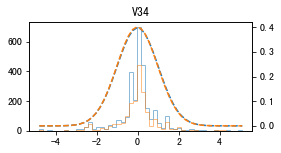

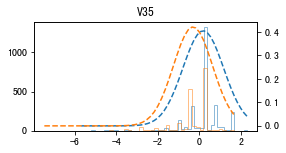

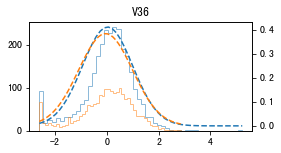

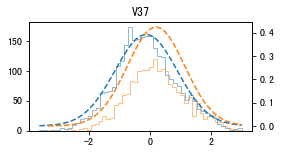

In [50]:
for i in test_raw.columns.tolist():
    fig, ax1 = plt.subplots(figsize=(4,2))
    ax2 = ax1.twinx()
    ax1.set_title(i)
    
    n, bins, patches = ax1.hist(train_raw[i], bins=50, alpha=0.5, label='train',histtype='step')
    mu = train_raw[i].mean()
    sigma = train_raw[i].std()
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax2.plot(bins, y, '--')

    n, bins, patches = ax1.hist(test_raw[i], bins=50, alpha=0.5, label='test', histtype='step')
    mu = test_raw[i].mean()
    sigma = test_raw[i].std()
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax2.plot(bins, y, '--')
    
    plt.show()

In [51]:
drop_dis_col = ['V2','V5','V11','V13','V17','V19','V20','V21','V22','V27','V28','V29',]

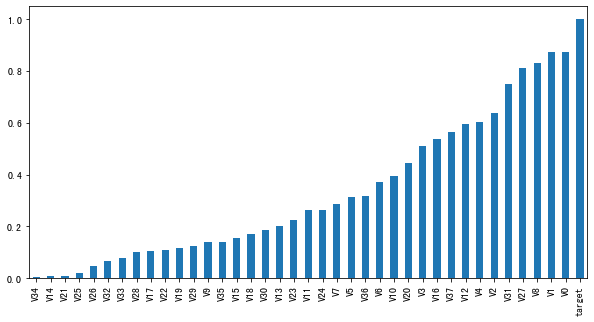

In [58]:
abs(train_raw.corrwith(train_raw['target'])).sort_values().plot(kind='bar', figsize=(10,5))
plt.show()

In [76]:
temp = abs(train_raw.corrwith(train_raw['target']))
drop_corrwith_col = temp[temp<0.1].index.tolist()
drop_corrwith_col

['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34']

In [94]:
drop_cor_col = set()
corr = abs(train_raw.corr())
for i in train_raw.columns.tolist():
    if i in drop_dis_col + drop_corrwith_col:
        continue
    for j in corr[i][corr[i]>0.8].index.tolist():
        if i == j or j == 'target' or i == 'target' or j in drop_dis_col + drop_corrwith_col:
            continue
        drop_cor_col.add((i, j))
set(drop_cor_col)

{('V0', 'V1'),
 ('V1', 'V0'),
 ('V1', 'V8'),
 ('V10', 'V36'),
 ('V12', 'V4'),
 ('V16', 'V6'),
 ('V31', 'V8'),
 ('V36', 'V10'),
 ('V4', 'V12'),
 ('V6', 'V16'),
 ('V6', 'V7'),
 ('V7', 'V6'),
 ('V8', 'V1'),
 ('V8', 'V31')}

In [95]:
drop_cor_col_ = ['V0','V8','V10','V4','V6','V31']

In [98]:
drop_col = set(drop_cor_col_ + drop_corrwith_col + drop_dis_col)

In [100]:
use_col = [x for x in test_raw.columns.tolist() if x not in drop_col]

In [102]:
train_raw[use_col]

,V1,V3,V7,V9,V12,V15,V16,V18,V23,V24,V30,V35,V36,V37
0,0.016,0.407,-2.360,-2.114,-0.073,0.000,-1.707,-0.573,0.356,0.800,0.109,-5.101,-2.608,-3.508
1,0.437,0.566,-2.360,-2.114,-0.134,0.000,-0.977,-0.571,0.357,0.801,0.124,0.364,-0.335,-0.730
2,0.568,0.370,-2.360,-2.114,-0.072,-0.212,-0.618,-0.564,0.355,0.961,0.361,0.364,0.765,-0.589
3,0.368,0.165,-2.086,-2.114,-0.014,-0.162,-0.429,-0.574,0.352,1.435,0.417,0.364,0.333,-0.112
4,0.638,0.209,-2.086,-2.114,0.199,-0.138,-0.391,-0.572,0.352,0.881,1.078,0.364,-0.280,-0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-0.025,0.161,0.584,0.904,0.436,0.125,0.563,0.454,-0.175,-1.310,-0.208,-0.349,0.576,0.686
2884,0.557,0.183,0.584,0.904,0.414,0.143,0.300,0.808,-0.184,-1.314,-0.287,-0.349,-0.615,-0.380
2885,-0.721,0.084,0.614,0.904,-0.185,0.332,0.288,0.813,-0.189,-1.310,-0.179,-0.349,0.951,0.748
2886,-0.282,-0.049,0.583,0.904,-0.053,0.239,0.012,0.803,0.098,-1.313,1.061,-0.230,-0.301,0.555


# 模型训练

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [158]:
train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_raw[use_col])
test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_raw[use_col])

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
ss = StandardScaler()
train = ss.fit_transform(train)
test = ss.transform(test)

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
train_x, val_x, train_y, val_y = train_test_split(train, train_raw['target'])

print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('val_x', val_x.shape)
print('val_y', val_y.shape)

train_x (2166, 119)
train_y (2166,)
val_x (722, 119)
val_y (722,)


# LR

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lr = LinearRegression()
lr.fit(train_x, train_y)
lr_y_pre = lr.predict(val_x)

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
mean_squared_error(val_y, lr_y_pre)

0.1380756907453387

# LightGBM

In [182]:
from lightgbm import LGBMRegressor

In [183]:
lgb = LGBMRegressor()
lgb.fit(train_x, train_y)
lgb_y_pre = lgb.predict(val_x)

In [184]:
mean_squared_error(val_y, lgb_y_pre)

0.1269486680195338

In [185]:
from sklearn.model_selection import learning_curve

In [186]:
def plot_learn_curve(estimator, x, y):
    
    train_sizes_abs, train_scores, test_scores = learning_curve(
        estimator=estimator, X=x, y=y, cv=3,
        train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), 
        scoring='neg_mean_squared_error'
    )
    
    plt.plot(train_scores.mean(axis=1), label='train')
    plt.plot(test_scores.mean(axis=1), label='test')
    plt.axhline(y=0,c="r")
    plt.xticks(ticks=[x for x in range(5)], labels=train_sizes_abs)
    plt.legend()
    plt.ylim(-1,0.1)
    plt.grid()
    plt.show()

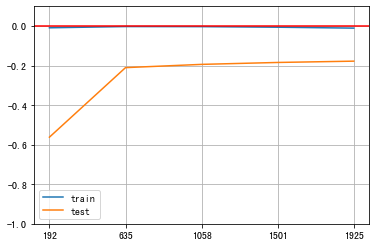

In [187]:
plot_learn_curve(LGBMRegressor(), train, train_raw['target'])

In [170]:
lr_sub =LinearRegression()
lr_sub.fit(train, train_raw['target'])
sub = lr_sub.predict(test)

In [171]:
sub

array([ 0.32939406,  0.45498203,  0.04862882, ..., -2.65499362,
       -2.75529441, -2.87261571])

In [188]:
lgb_sub = LGBMRegressor()
lgb_sub.fit(train, train_raw['target'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [172]:
def predict_test_set(estimator, test, file_path):
    sub = estimator.predict(test)
    pd.DataFrame(sub).to_csv(file_path, header=False, index=False)
    return file_path[2:]

In [189]:
predict_test_set(lgb_sub, test, './sub_2_lgb.txt')

'sub_2_lgb.txt'

In [175]:
sub.shape

(1925,)